In [1]:
# Import our dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

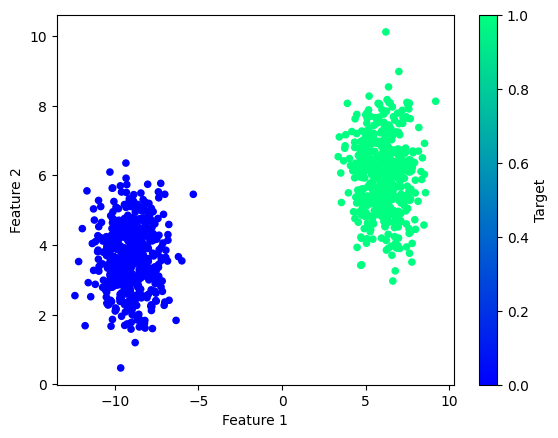

In [2]:
# Import the sample data
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_1/datasets/sample-data-1000.csv")

# Plot the sample data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Separate the X and y
X = df.drop(columns="Target")
y = df["Target"]

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Set input nodes to the number of features
input_nodes = len(X.columns)

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=input_nodes))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.7174 - accuracy: 0.4933
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.4933
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.4933
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.4933
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.5347
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.6667
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7813
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.8760
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.9347
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.9640
Epoch 11/

<Axes: >

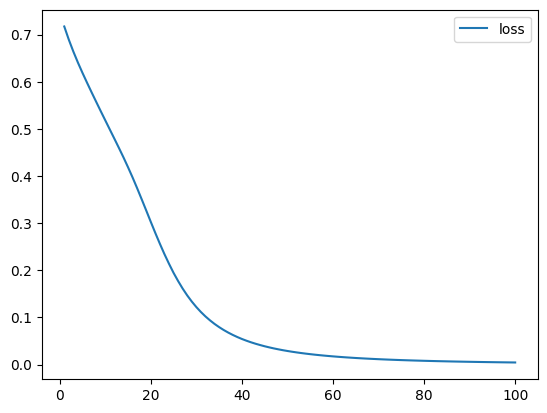

In [10]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<Axes: >

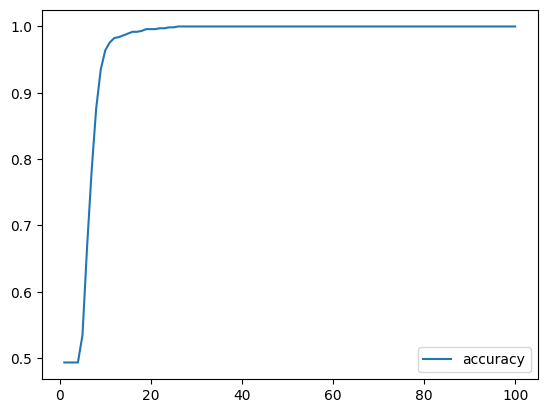

In [11]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0035 - accuracy: 1.0000 - 165ms/epoch - 21ms/step
Loss: 0.0035116749349981546, Accuracy: 1.0
